In [21]:
import sys
# sys.path.append(r'E:/0code')
# sys.path.append(r'/home/wyf/0code')
# sys.path.append(r'/home/wangyf226/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')

%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import gensim
import re
import smart_open
from pyml.feature_extraction.text import CountVectorizer
from pyml.linear_model.classification import LogisticClassifier
from pyml.neighbors.classification import KNeighborsClassifier
from pyml.neural_network.classification import MLPClassifier
from pyml.metrics.classification import precision_score
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.preprocessing import StandardScaler
from pyml.logger import logger
import logging
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 读取数据集

In [2]:
train_X_vec2doc_2 = np.load('../data/wyf-train_X-doc2vec-500.npy')
test_X_vec2doc_2 = np.load('../data/wyf-test_X-doc2vec-500.npy')

In [6]:
train_X_vec2doc = np.load('../data/clean/trainX_vec2doc-24000-500.npy')
test_X_vec2doc = np.load('../data/clean/testX_vec2doc-6000-500.npy')

In [7]:
train_X_tfidf = np.load('../data/clean/trainX_tfidf-24000-62761.npy')
test_X_tfidf = np.load('../data/clean/testX_tfidf-6000-62761.npy')

In [8]:
train_X_onehot = np.load('../data/clean/trainX_onehot-24000-62761.npy')
test_X_onehot = np.load('../data/clean/testX_onthot-6000-62761.npy')

In [3]:
train_X = train_X_vec2doc_2
test_X = test_X_vec2doc_2

In [9]:
train_X = train_X_vec2doc
test_X = test_X_vec2doc

In [ ]:
train_X = train_X_tfidf
test_X = test_X_tfidf

In [ ]:
train_X = train_X_onehot
test_X = test_X_onehot

In [4]:
train_Y = np.load('../data/clean/trainY_24000.npy')

In [5]:
train_X.shape,train_Y.shape,test_X.shape

((24000, 500), (24000,), (6000, 500))

# 交叉验证

# 使用gd

In [6]:
train_X = train_X_vec2doc_2
test_X = test_X_vec2doc_2

In [7]:
logger.setLevel(20)

In [12]:
learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4]
num_iterations = 5000
hidden_size = 6
mini_batch=0

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_1 = []
for train_indices, test_indices in ms.split(train_X):
    for learning_rate in learning_rates:
        clf = MLPClassifier(
            learning_rate=learning_rate, 
            num_iterations=num_iterations,
            hidden_size=hidden_size,
            optimizer='gd',
            print_intervel=100)
        clf.feat_data(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        clf.train()
        models_1.append(clf)

[    INFO] - [classification] - [288] - [     train] 
train 0/5000  current cost: 0.6928993611079736, train: 0.5366145833333333 ,valid: 0.5520833333333334

[    INFO] - [classification] - [288] - [     train] 
train 100/5000  current cost: 0.691880085434664, train: 0.6105208333333333 ,valid: 0.6204166666666666

[    INFO] - [classification] - [288] - [     train] 
train 200/5000  current cost: 0.6896099598124565, train: 0.6774479166666667 ,valid: 0.67875

[    INFO] - [classification] - [288] - [     train] 
train 300/5000  current cost: 0.6840176594351027, train: 0.7480208333333334 ,valid: 0.745625

[    INFO] - [classification] - [288] - [     train] 
train 400/5000  current cost: 0.6709066360462214, train: 0.7972916666666666 ,valid: 0.793125

[    INFO] - [classification] - [288] - [     train] 
train 500/5000  current cost: 0.6440850016758362, train: 0.8236458333333333 ,valid: 0.82

[    INFO] - [classification] - [288] - [     train] 
train 600/5000  current cost: 0.60004379817229

[    INFO] - [classification] - [288] - [     train] 
train 500/5000  current cost: 0.4079591794281562, train: 0.85875 ,valid: 0.85625

[    INFO] - [classification] - [288] - [     train] 
train 600/5000  current cost: 0.36358469815586925, train: 0.8628125 ,valid: 0.8585416666666666

[    INFO] - [classification] - [288] - [     train] 
train 700/5000  current cost: 0.3403034945715038, train: 0.8661979166666667 ,valid: 0.8591666666666666

[    INFO] - [classification] - [288] - [     train] 
train 800/5000  current cost: 0.32748431272267703, train: 0.86890625 ,valid: 0.8579166666666667

[    INFO] - [classification] - [288] - [     train] 
train 900/5000  current cost: 0.31996547433109673, train: 0.869375 ,valid: 0.8595833333333334

[    INFO] - [classification] - [288] - [     train] 
train 1000/5000  current cost: 0.315274611145062, train: 0.87046875 ,valid: 0.85875

[    INFO] - [classification] - [288] - [     train] 
train 1100/5000  current cost: 0.3121774004196667, train: 0.871

[    INFO] - [classification] - [288] - [     train] 
train 1000/5000  current cost: 0.3009640139355488, train: 0.8748958333333333 ,valid: 0.8589583333333334

[    INFO] - [classification] - [288] - [     train] 
train 1100/5000  current cost: 0.2996875957615202, train: 0.8747916666666666 ,valid: 0.8583333333333333

[    INFO] - [classification] - [288] - [     train] 
train 1200/5000  current cost: 0.29833683653302256, train: 0.8747916666666666 ,valid: 0.8579166666666667

[    INFO] - [classification] - [288] - [     train] 
train 1300/5000  current cost: 0.2969350433936235, train: 0.8752604166666667 ,valid: 0.8575

[    INFO] - [classification] - [288] - [     train] 
train 1400/5000  current cost: 0.29550452346008077, train: 0.8753125 ,valid: 0.8579166666666667

[    INFO] - [classification] - [288] - [     train] 
train 1500/5000  current cost: 0.29406263351833317, train: 0.8752604166666667 ,valid: 0.8579166666666667

[    INFO] - [classification] - [288] - [     train] 
train 1600

[    INFO] - [classification] - [288] - [     train] 
train 1400/5000  current cost: 0.2761996141297979, train: 0.8811979166666667 ,valid: 0.855

[    INFO] - [classification] - [288] - [     train] 
train 1500/5000  current cost: 0.273525826438842, train: 0.8829166666666667 ,valid: 0.8560416666666667

[    INFO] - [classification] - [288] - [     train] 
train 1600/5000  current cost: 0.27085244490147253, train: 0.8844270833333333 ,valid: 0.8560416666666667

[    INFO] - [classification] - [288] - [     train] 
train 1700/5000  current cost: 0.2681794204769375, train: 0.88546875 ,valid: 0.8541666666666666

[    INFO] - [classification] - [288] - [     train] 
train 1800/5000  current cost: 0.2655091262877266, train: 0.8865104166666666 ,valid: 0.8545833333333334

[    INFO] - [classification] - [288] - [     train] 
train 1900/5000  current cost: 0.2628445603380659, train: 0.8880208333333334 ,valid: 0.8533333333333334

[    INFO] - [classification] - [288] - [     train] 
train 2000/50

[    INFO] - [classification] - [288] - [     train] 
train 1800/5000  current cost: 0.22168644537680024, train: 0.9109895833333334 ,valid: 0.85

[    INFO] - [classification] - [288] - [     train] 
train 1900/5000  current cost: 0.2175700449923827, train: 0.91296875 ,valid: 0.84875

[    INFO] - [classification] - [288] - [     train] 
train 2000/5000  current cost: 0.21359545552606563, train: 0.915625 ,valid: 0.845625

[    INFO] - [classification] - [288] - [     train] 
train 2100/5000  current cost: 0.20973946239419922, train: 0.9177083333333333 ,valid: 0.8439583333333334

[    INFO] - [classification] - [288] - [     train] 
train 2200/5000  current cost: 0.2059944706547399, train: 0.9188541666666666 ,valid: 0.8435416666666666

[    INFO] - [classification] - [288] - [     train] 
train 2300/5000  current cost: 0.20237518203739127, train: 0.9203125 ,valid: 0.843125

[    INFO] - [classification] - [288] - [     train] 
train 2400/5000  current cost: 0.19888573487273864, train: 0

[    INFO] - [classification] - [288] - [     train] 
train 2200/5000  current cost: 0.16307379513293707, train: 0.9343229166666667 ,valid: 0.8316666666666667

[    INFO] - [classification] - [288] - [     train] 
train 2300/5000  current cost: 0.15999102189844236, train: 0.9354166666666667 ,valid: 0.8310416666666667

[    INFO] - [classification] - [288] - [     train] 
train 2400/5000  current cost: 0.1570701534104498, train: 0.93640625 ,valid: 0.8320833333333333

[    INFO] - [classification] - [288] - [     train] 
train 2500/5000  current cost: 0.15422141598181763, train: 0.9377604166666667 ,valid: 0.8320833333333333

[    INFO] - [classification] - [288] - [     train] 
train 2600/5000  current cost: 0.15146531571113317, train: 0.9383333333333334 ,valid: 0.8322916666666667

[    INFO] - [classification] - [288] - [     train] 
train 2700/5000  current cost: 0.14885720782759485, train: 0.9397395833333333 ,valid: 0.8314583333333333

[    INFO] - [classification] - [288] - [     tra

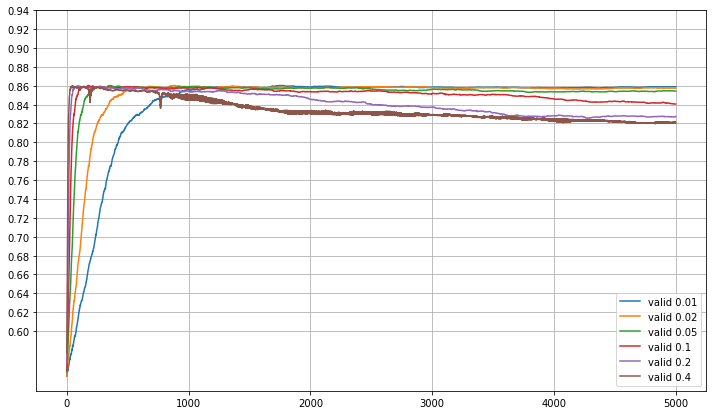

In [13]:
plt.figure(figsize=(12,7)) 
argu_range = learning_rates 
for i,m in enumerate(models_1):
    plt.plot(range(0,len(m.information['valid_loss'])),m.information['valid_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 使用mini-batch

In [22]:
learning_rate = 0.02
num_iterations = 4000
hidden_size = 6
mini_batches = [100,200,400,800,1600,3200,6400]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_2 = []
for train_indices, test_indices in ms.split(train_X):
    for mini_batch in mini_batches:
        clf = MLPClassifier(
            learning_rate=learning_rate, 
            num_iterations=num_iterations,
            hidden_size=hidden_size,
            optimizer='mini-batch',
            print_intervel=100,
            mini_batch=mini_batch)
        clf.feat_data(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        clf.train()
        models_2.append(clf)

[    INFO] - [classification] - [299] - [     train] 
train 0/4000  current cost: 0.6928076554486364, train: 0.5346875 ,valid: 0.5433333333333333

[    INFO] - [classification] - [299] - [     train] 
train 100/4000  current cost: 0.6885117169484299, train: 0.6563020833333333 ,valid: 0.6545833333333333

[    INFO] - [classification] - [299] - [     train] 
train 200/4000  current cost: 0.6719777274630289, train: 0.7946354166666667 ,valid: 0.7904166666666667

[    INFO] - [classification] - [299] - [     train] 
train 300/4000  current cost: 0.5821411701708661, train: 0.8360416666666667 ,valid: 0.830625

[    INFO] - [classification] - [299] - [     train] 
train 400/4000  current cost: 0.49818686253872496, train: 0.8494270833333334 ,valid: 0.8489583333333334

[    INFO] - [classification] - [299] - [     train] 
train 500/4000  current cost: 0.3954341989121359, train: 0.85796875 ,valid: 0.8545833333333334

[    INFO] - [classification] - [299] - [     train] 
train 600/4000  current co

[    INFO] - [classification] - [299] - [     train] 
train 1400/4000  current cost: 0.2889305851045148, train: 0.8723958333333334 ,valid: 0.8585416666666666

[    INFO] - [classification] - [299] - [     train] 
train 1500/4000  current cost: 0.23022744842879886, train: 0.8728645833333334 ,valid: 0.8579166666666667

[    INFO] - [classification] - [299] - [     train] 
train 1600/4000  current cost: 0.3037300613152445, train: 0.8725520833333333 ,valid: 0.8585416666666666

[    INFO] - [classification] - [299] - [     train] 
train 1700/4000  current cost: 0.3395210687183199, train: 0.8732291666666666 ,valid: 0.8583333333333333

[    INFO] - [classification] - [299] - [     train] 
train 1800/4000  current cost: 0.265566971366186, train: 0.8735416666666667 ,valid: 0.8577083333333333

[    INFO] - [classification] - [299] - [     train] 
train 1900/4000  current cost: 0.3032233322209134, train: 0.8736979166666666 ,valid: 0.8579166666666667

[    INFO] - [classification] - [299] - [     

[    INFO] - [classification] - [299] - [     train] 
train 2800/4000  current cost: 0.3126594895962072, train: 0.87515625 ,valid: 0.858125

[    INFO] - [classification] - [299] - [     train] 
train 2900/4000  current cost: 0.3245921238014254, train: 0.8755729166666667 ,valid: 0.8575

[    INFO] - [classification] - [299] - [     train] 
train 3000/4000  current cost: 0.33806539918777506, train: 0.8753645833333333 ,valid: 0.859375

[    INFO] - [classification] - [299] - [     train] 
train 3100/4000  current cost: 0.2624827565894637, train: 0.8752604166666667 ,valid: 0.8570833333333333

[    INFO] - [classification] - [299] - [     train] 
train 3200/4000  current cost: 0.353142781257055, train: 0.8755208333333333 ,valid: 0.8570833333333333

[    INFO] - [classification] - [299] - [     train] 
train 3300/4000  current cost: 0.27299888888228396, train: 0.875 ,valid: 0.858125

[    INFO] - [classification] - [299] - [     train] 
train 3400/4000  current cost: 0.320358156901271, trai

[    INFO] - [classification] - [299] - [     train] 
train 200/4000  current cost: 0.6715722814317338, train: 0.7969270833333333 ,valid: 0.7933333333333333

[    INFO] - [classification] - [299] - [     train] 
train 300/4000  current cost: 0.5994764219403396, train: 0.8365104166666667 ,valid: 0.8308333333333333

[    INFO] - [classification] - [299] - [     train] 
train 400/4000  current cost: 0.48391169931634054, train: 0.8496354166666666 ,valid: 0.8485416666666666

[    INFO] - [classification] - [299] - [     train] 
train 500/4000  current cost: 0.4169760369926858, train: 0.85875 ,valid: 0.8560416666666667

[    INFO] - [classification] - [299] - [     train] 
train 600/4000  current cost: 0.35836554690011807, train: 0.86296875 ,valid: 0.8583333333333333

[    INFO] - [classification] - [299] - [     train] 
train 700/4000  current cost: 0.33161625690106095, train: 0.86625 ,valid: 0.8589583333333334

[    INFO] - [classification] - [299] - [     train] 
train 800/4000  current c

[    INFO] - [classification] - [299] - [     train] 
train 1600/4000  current cost: 0.3197443049431134, train: 0.8727083333333333 ,valid: 0.8583333333333333

[    INFO] - [classification] - [299] - [     train] 
train 1700/4000  current cost: 0.3116113443917036, train: 0.87296875 ,valid: 0.8579166666666667

[    INFO] - [classification] - [299] - [     train] 
train 1800/4000  current cost: 0.30191408504389444, train: 0.87296875 ,valid: 0.8583333333333333

[    INFO] - [classification] - [299] - [     train] 
train 1900/4000  current cost: 0.31762868332083694, train: 0.8738020833333333 ,valid: 0.8583333333333333

[    INFO] - [classification] - [299] - [     train] 
train 2000/4000  current cost: 0.31047859024608715, train: 0.8739583333333333 ,valid: 0.8577083333333333

[    INFO] - [classification] - [299] - [     train] 
train 2100/4000  current cost: 0.3002814370479073, train: 0.8741666666666666 ,valid: 0.8583333333333333

[    INFO] - [classification] - [299] - [     train] 
train

[    INFO] - [classification] - [299] - [     train] 
train 3000/4000  current cost: 0.29784006924434187, train: 0.87484375 ,valid: 0.8579166666666667

[    INFO] - [classification] - [299] - [     train] 
train 3100/4000  current cost: 0.29438707696017324, train: 0.8751041666666667 ,valid: 0.8575

[    INFO] - [classification] - [299] - [     train] 
train 3200/4000  current cost: 0.30120595636090436, train: 0.8752604166666667 ,valid: 0.8572916666666667

[    INFO] - [classification] - [299] - [     train] 
train 3300/4000  current cost: 0.29609473313182155, train: 0.8753645833333333 ,valid: 0.8575

[    INFO] - [classification] - [299] - [     train] 
train 3400/4000  current cost: 0.2928633881371631, train: 0.8753645833333333 ,valid: 0.8579166666666667

[    INFO] - [classification] - [299] - [     train] 
train 3500/4000  current cost: 0.2993538442619338, train: 0.8753645833333333 ,valid: 0.8579166666666667

[    INFO] - [classification] - [299] - [     train] 
train 3600/4000  cur

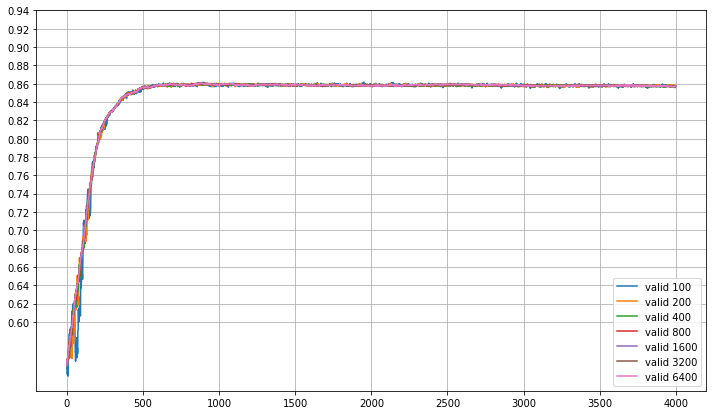

In [23]:
plt.figure(figsize=(12,7)) 
argu_range = mini_batches
for i,m in enumerate(models_2):
    plt.plot(range(0,len(m.information['valid_loss'])),m.information['valid_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 使用onehot矩阵-隐藏层节点数量

In [42]:
train_X = train_X_onehot
test_X = test_X_onehot

In [33]:
# train_X = train_X.astype('int64')
# test_X = test_X.astype('int64')

In [34]:
# pca = PCA()
# pca.fit(train_X)

In [36]:
# train_X = pca.transform(train_X)
# test_X = pca.transform(test_X)

In [44]:
learning_rate = 0.2
num_iterations = 500
hidden_sizes = range(2,11,4)
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for train_indices, test_indices in ms.split(train_X):
    for hidden_size in hidden_sizes:
        clf = MLPClassifier(learning_rate=learning_rate, num_iterations=num_iterations,hidden_size=hidden_size,optimizer='gd')
        clf.feat_data(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        clf.train()
        models.append(clf)

[    INFO] - [classification] - [239] - [     train] 
train 0/500  current cost: 0.6931245407434862, train: 0.5148958333333333 ,valid: 0.515625

[    INFO] - [classification] - [239] - [     train] 
train 1/500  current cost: 0.693105930406205, train: 0.5184895833333333 ,valid: 0.5272916666666667

[    INFO] - [classification] - [239] - [     train] 
train 2/500  current cost: 0.6930873385812135, train: 0.52421875 ,valid: 0.5272916666666667

[    INFO] - [classification] - [239] - [     train] 
train 3/500  current cost: 0.6930684011591385, train: 0.5274479166666667 ,valid: 0.526875

[    INFO] - [classification] - [239] - [     train] 
train 4/500  current cost: 0.6930487568666072, train: 0.5275520833333334 ,valid: 0.5258333333333334

[    INFO] - [classification] - [239] - [     train] 
train 5/500  current cost: 0.6930280402806536, train: 0.5263020833333333 ,valid: 0.5210416666666666

[    INFO] - [classification] - [239] - [     train] 
train 6/500  current cost: 0.6930058749934762

[    INFO] - [classification] - [239] - [     train] 
train 56/500  current cost: 0.6381446198523248, train: 0.79828125 ,valid: 0.8002083333333333

[    INFO] - [classification] - [239] - [     train] 
train 57/500  current cost: 0.6333319235491126, train: 0.8009895833333334 ,valid: 0.8010416666666667

[    INFO] - [classification] - [239] - [     train] 
train 58/500  current cost: 0.6282857953278589, train: 0.8021875 ,valid: 0.8033333333333333

[    INFO] - [classification] - [239] - [     train] 
train 59/500  current cost: 0.623018743820332, train: 0.8038020833333334 ,valid: 0.805625

[    INFO] - [classification] - [239] - [     train] 
train 60/500  current cost: 0.6175455766692979, train: 0.8055729166666666 ,valid: 0.8070833333333334

[    INFO] - [classification] - [239] - [     train] 
train 61/500  current cost: 0.6118831251862408, train: 0.8065625 ,valid: 0.8083333333333333

[    INFO] - [classification] - [239] - [     train] 
train 62/500  current cost: 0.6060499220353786,

[    INFO] - [classification] - [239] - [     train] 
train 111/500  current cost: 0.5505425515572565, train: 0.7246354166666666 ,valid: 0.7158333333333333

[    INFO] - [classification] - [239] - [     train] 
train 112/500  current cost: 0.537902627029002, train: 0.5761979166666666 ,valid: 0.585

[    INFO] - [classification] - [239] - [     train] 
train 113/500  current cost: 0.6884184700962628, train: 0.83859375 ,valid: 0.8297916666666667

[    INFO] - [classification] - [239] - [     train] 
train 114/500  current cost: 0.4228102124418726, train: 0.8365104166666667 ,valid: 0.8327083333333334

[    INFO] - [classification] - [239] - [     train] 
train 115/500  current cost: 0.42143131988133065, train: 0.8082291666666667 ,valid: 0.8064583333333334

[    INFO] - [classification] - [239] - [     train] 
train 116/500  current cost: 0.43602103033243644, train: 0.7210416666666667 ,valid: 0.7239583333333334

[    INFO] - [classification] - [239] - [     train] 
train 117/500  current c

[    INFO] - [classification] - [239] - [     train] 
train 166/500  current cost: 0.41101549474316823, train: 0.8043229166666667 ,valid: 0.7975

[    INFO] - [classification] - [239] - [     train] 
train 167/500  current cost: 0.4191357525564184, train: 0.8234375 ,valid: 0.8166666666666667

[    INFO] - [classification] - [239] - [     train] 
train 168/500  current cost: 0.4089596104764528, train: 0.80578125 ,valid: 0.799375

[    INFO] - [classification] - [239] - [     train] 
train 169/500  current cost: 0.41672913435340797, train: 0.8244270833333334 ,valid: 0.8172916666666666

[    INFO] - [classification] - [239] - [     train] 
train 170/500  current cost: 0.4069379758785533, train: 0.8078645833333333 ,valid: 0.8010416666666667

[    INFO] - [classification] - [239] - [     train] 
train 171/500  current cost: 0.41435679987099555, train: 0.8256770833333333 ,valid: 0.8177083333333334

[    INFO] - [classification] - [239] - [     train] 
train 172/500  current cost: 0.404895890

[    INFO] - [classification] - [239] - [     train] 
train 221/500  current cost: 0.37234922510245777, train: 0.8478645833333334 ,valid: 0.8339583333333334

[    INFO] - [classification] - [239] - [     train] 
train 222/500  current cost: 0.36701673358754533, train: 0.8320833333333333 ,valid: 0.82125

[    INFO] - [classification] - [239] - [     train] 
train 223/500  current cost: 0.37112652261759954, train: 0.8483854166666667 ,valid: 0.8341666666666666

[    INFO] - [classification] - [239] - [     train] 
train 224/500  current cost: 0.3658542909183481, train: 0.8327083333333334 ,valid: 0.8222916666666666

[    INFO] - [classification] - [239] - [     train] 
train 225/500  current cost: 0.36992525056461395, train: 0.8490104166666667 ,valid: 0.834375

[    INFO] - [classification] - [239] - [     train] 
train 226/500  current cost: 0.36470952549101615, train: 0.8334375 ,valid: 0.8222916666666666

[    INFO] - [classification] - [239] - [     train] 
train 227/500  current cost: 

[    INFO] - [classification] - [239] - [     train] 
train 276/500  current cost: 0.34039509998730205, train: 0.8463020833333333 ,valid: 0.8272916666666666

[    INFO] - [classification] - [239] - [     train] 
train 277/500  current cost: 0.34405321322406746, train: 0.86234375 ,valid: 0.84375

[    INFO] - [classification] - [239] - [     train] 
train 278/500  current cost: 0.33955392663938533, train: 0.8466666666666667 ,valid: 0.8272916666666666

[    INFO] - [classification] - [239] - [     train] 
train 279/500  current cost: 0.3432065022000963, train: 0.86265625 ,valid: 0.8433333333333334

[    INFO] - [classification] - [239] - [     train] 
train 280/500  current cost: 0.33872070213130173, train: 0.8471354166666667 ,valid: 0.8275

[    INFO] - [classification] - [239] - [     train] 
train 281/500  current cost: 0.342367902034577, train: 0.86296875 ,valid: 0.8435416666666666

[    INFO] - [classification] - [239] - [     train] 
train 282/500  current cost: 0.33789526275879567

[    INFO] - [classification] - [239] - [     train] 
train 331/500  current cost: 0.3236045746147918, train: 0.8713541666666667 ,valid: 0.8495833333333334

[    INFO] - [classification] - [239] - [     train] 
train 332/500  current cost: 0.31941341798774087, train: 0.8552083333333333 ,valid: 0.83

[    INFO] - [classification] - [239] - [     train] 
train 333/500  current cost: 0.32292885694892837, train: 0.8718229166666667 ,valid: 0.8497916666666666

[    INFO] - [classification] - [239] - [     train] 
train 334/500  current cost: 0.31874791513222467, train: 0.8556770833333334 ,valid: 0.83

[    INFO] - [classification] - [239] - [     train] 
train 335/500  current cost: 0.3222580415923496, train: 0.8722395833333333 ,valid: 0.85

[    INFO] - [classification] - [239] - [     train] 
train 336/500  current cost: 0.3180872804390786, train: 0.8558854166666666 ,valid: 0.8297916666666667

[    INFO] - [classification] - [239] - [     train] 
train 337/500  current cost: 0.321592046501

[    INFO] - [classification] - [239] - [     train] 
train 386/500  current cost: 0.3029775371137236, train: 0.8627604166666667 ,valid: 0.8320833333333333

[    INFO] - [classification] - [239] - [     train] 
train 387/500  current cost: 0.30634030571704024, train: 0.87875 ,valid: 0.85375

[    INFO] - [classification] - [239] - [     train] 
train 388/500  current cost: 0.30242360678226177, train: 0.8630208333333333 ,valid: 0.8322916666666667

[    INFO] - [classification] - [239] - [     train] 
train 389/500  current cost: 0.30578171538397547, train: 0.8791666666666667 ,valid: 0.85375

[    INFO] - [classification] - [239] - [     train] 
train 390/500  current cost: 0.3018731481051599, train: 0.863125 ,valid: 0.8325

[    INFO] - [classification] - [239] - [     train] 
train 391/500  current cost: 0.3052267969280474, train: 0.8793229166666666 ,valid: 0.85375

[    INFO] - [classification] - [239] - [     train] 
train 392/500  current cost: 0.30132611575889473, train: 0.86322916

[    INFO] - [classification] - [239] - [     train] 
train 441/500  current cost: 0.2924217027561263, train: 0.8840104166666667 ,valid: 0.8572916666666667

[    INFO] - [classification] - [239] - [     train] 
train 442/500  current cost: 0.28864025245875197, train: 0.86796875 ,valid: 0.8352083333333333

[    INFO] - [classification] - [239] - [     train] 
train 443/500  current cost: 0.29194708079455534, train: 0.8841666666666667 ,valid: 0.8575

[    INFO] - [classification] - [239] - [     train] 
train 444/500  current cost: 0.28816801567047323, train: 0.8682291666666667 ,valid: 0.835625

[    INFO] - [classification] - [239] - [     train] 
train 445/500  current cost: 0.2914749827830107, train: 0.88421875 ,valid: 0.8575

[    INFO] - [classification] - [239] - [     train] 
train 446/500  current cost: 0.2876981960402094, train: 0.8683333333333333 ,valid: 0.8358333333333333

[    INFO] - [classification] - [239] - [     train] 
train 447/500  current cost: 0.29100537370929624, t

[    INFO] - [classification] - [239] - [     train] 
train 496/500  current cost: 0.27667013133394, train: 0.8728645833333334 ,valid: 0.8389583333333334

[    INFO] - [classification] - [239] - [     train] 
train 497/500  current cost: 0.2799908454236133, train: 0.8890625 ,valid: 0.8604166666666667

[    INFO] - [classification] - [239] - [     train] 
train 498/500  current cost: 0.2762553727499632, train: 0.8731770833333333 ,valid: 0.8389583333333334

[    INFO] - [classification] - [239] - [     train] 
train 499/500  current cost: 0.27957661068217565, train: 0.8891145833333334 ,valid: 0.860625

[    INFO] - [classification] - [239] - [     train] 
train 0/500  current cost: 0.6931075673639919, train: 0.5090625 ,valid: 0.5016666666666667

[    INFO] - [classification] - [239] - [     train] 
train 1/500  current cost: 0.6930890746319108, train: 0.5091145833333334 ,valid: 0.5033333333333333

[    INFO] - [classification] - [239] - [     train] 
train 2/500  current cost: 0.69307006

[    INFO] - [classification] - [239] - [     train] 
train 51/500  current cost: 0.6487173332523092, train: 0.7906770833333333 ,valid: 0.7954166666666667

[    INFO] - [classification] - [239] - [     train] 
train 52/500  current cost: 0.6440368097366942, train: 0.79265625 ,valid: 0.7979166666666667

[    INFO] - [classification] - [239] - [     train] 
train 53/500  current cost: 0.6390061721649515, train: 0.7939583333333333 ,valid: 0.799375

[    INFO] - [classification] - [239] - [     train] 
train 54/500  current cost: 0.6336264341504523, train: 0.7952083333333333 ,valid: 0.8002083333333333

[    INFO] - [classification] - [239] - [     train] 
train 55/500  current cost: 0.6279035882368984, train: 0.7969270833333333 ,valid: 0.8008333333333333

[    INFO] - [classification] - [239] - [     train] 
train 56/500  current cost: 0.6218489017962862, train: 0.7982291666666667 ,valid: 0.8014583333333334

[    INFO] - [classification] - [239] - [     train] 
train 57/500  current cost: 

[    INFO] - [classification] - [239] - [     train] 
train 106/500  current cost: 1.4313338984747863, train: 0.8284375 ,valid: 0.8225

[    INFO] - [classification] - [239] - [     train] 
train 107/500  current cost: 0.4000171393965169, train: 0.76375 ,valid: 0.763125

[    INFO] - [classification] - [239] - [     train] 
train 108/500  current cost: 0.4810121278643649, train: 0.6128125 ,valid: 0.6079166666666667

[    INFO] - [classification] - [239] - [     train] 
train 109/500  current cost: 0.73821172613918, train: 0.5405729166666666 ,valid: 0.5489583333333333

[    INFO] - [classification] - [239] - [     train] 
train 110/500  current cost: 0.933198358733348, train: 0.68984375 ,valid: 0.681875

[    INFO] - [classification] - [239] - [     train] 
train 111/500  current cost: 0.5743332857695862, train: 0.6380729166666667 ,valid: 0.6420833333333333

[    INFO] - [classification] - [239] - [     train] 
train 112/500  current cost: 0.641143548070656, train: 0.6973958333333333 ,v

[    INFO] - [classification] - [239] - [     train] 
train 161/500  current cost: 0.4001669152516235, train: 0.8204166666666667 ,valid: 0.81375

[    INFO] - [classification] - [239] - [     train] 
train 162/500  current cost: 0.39705887251809385, train: 0.8202083333333333 ,valid: 0.8139583333333333

[    INFO] - [classification] - [239] - [     train] 
train 163/500  current cost: 0.39384650259147347, train: 0.8241145833333333 ,valid: 0.8179166666666666

[    INFO] - [classification] - [239] - [     train] 
train 164/500  current cost: 0.3910115833994498, train: 0.8233333333333334 ,valid: 0.8160416666666667

[    INFO] - [classification] - [239] - [     train] 
train 165/500  current cost: 0.3889683544574795, train: 0.8263541666666666 ,valid: 0.82

[    INFO] - [classification] - [239] - [     train] 
train 166/500  current cost: 0.3876192394312939, train: 0.8247395833333333 ,valid: 0.8164583333333333

[    INFO] - [classification] - [239] - [     train] 
train 167/500  current cost

[    INFO] - [classification] - [239] - [     train] 
train 216/500  current cost: 0.35357260975947574, train: 0.8422395833333334 ,valid: 0.8325

[    INFO] - [classification] - [239] - [     train] 
train 217/500  current cost: 0.35377250262917187, train: 0.84375 ,valid: 0.833125

[    INFO] - [classification] - [239] - [     train] 
train 218/500  current cost: 0.3523171081717714, train: 0.8425 ,valid: 0.8329166666666666

[    INFO] - [classification] - [239] - [     train] 
train 219/500  current cost: 0.35255253285688604, train: 0.8444270833333334 ,valid: 0.8335416666666666

[    INFO] - [classification] - [239] - [     train] 
train 220/500  current cost: 0.3511146777142072, train: 0.8430729166666666 ,valid: 0.8325

[    INFO] - [classification] - [239] - [     train] 
train 221/500  current cost: 0.35141966831953686, train: 0.8447395833333333 ,valid: 0.8333333333333334

[    INFO] - [classification] - [239] - [     train] 
train 222/500  current cost: 0.3500144951686664, train: 0

[    INFO] - [classification] - [239] - [     train] 
train 271/500  current cost: 0.3289503352147754, train: 0.8555208333333333 ,valid: 0.8370833333333333

[    INFO] - [classification] - [239] - [     train] 
train 272/500  current cost: 0.3272399628301494, train: 0.8556770833333334 ,valid: 0.8404166666666667

[    INFO] - [classification] - [239] - [     train] 
train 273/500  current cost: 0.328181497906715, train: 0.8555729166666667 ,valid: 0.8375

[    INFO] - [classification] - [239] - [     train] 
train 274/500  current cost: 0.3264601415142133, train: 0.85609375 ,valid: 0.8404166666666667

[    INFO] - [classification] - [239] - [     train] 
train 275/500  current cost: 0.32742005369366034, train: 0.8559895833333333 ,valid: 0.8377083333333334

[    INFO] - [classification] - [239] - [     train] 
train 276/500  current cost: 0.3256887130008869, train: 0.8565104166666667 ,valid: 0.840625

[    INFO] - [classification] - [239] - [     train] 
train 277/500  current cost: 0.326

[    INFO] - [classification] - [239] - [     train] 
train 326/500  current cost: 0.3086175893147889, train: 0.86453125 ,valid: 0.8452083333333333

[    INFO] - [classification] - [239] - [     train] 
train 327/500  current cost: 0.30996336451492207, train: 0.8650520833333334 ,valid: 0.8416666666666667

[    INFO] - [classification] - [239] - [     train] 
train 328/500  current cost: 0.3080070039827518, train: 0.8647916666666666 ,valid: 0.845625

[    INFO] - [classification] - [239] - [     train] 
train 329/500  current cost: 0.3093643941302274, train: 0.8655208333333333 ,valid: 0.8416666666666667

[    INFO] - [classification] - [239] - [     train] 
train 330/500  current cost: 0.3074010899162184, train: 0.865 ,valid: 0.8460416666666667

[    INFO] - [classification] - [239] - [     train] 
train 331/500  current cost: 0.30876990339792243, train: 0.8658854166666666 ,valid: 0.841875

[    INFO] - [classification] - [239] - [     train] 
train 332/500  current cost: 0.306799791693

[    INFO] - [classification] - [239] - [     train] 
train 380/500  current cost: 0.29358358774040055, train: 0.8710416666666667 ,valid: 0.8472916666666667

[    INFO] - [classification] - [239] - [     train] 
train 381/500  current cost: 0.2951802311911576, train: 0.8724479166666667 ,valid: 0.8425

[    INFO] - [classification] - [239] - [     train] 
train 382/500  current cost: 0.2930775418929448, train: 0.8713541666666667 ,valid: 0.8477083333333333

[    INFO] - [classification] - [239] - [     train] 
train 383/500  current cost: 0.29468127401377486, train: 0.8727604166666667 ,valid: 0.8427083333333333

[    INFO] - [classification] - [239] - [     train] 
train 384/500  current cost: 0.2925746578079682, train: 0.8716666666666667 ,valid: 0.8479166666666667

[    INFO] - [classification] - [239] - [     train] 
train 385/500  current cost: 0.2941853431661401, train: 0.87296875 ,valid: 0.8429166666666666

[    INFO] - [classification] - [239] - [     train] 
train 386/500  current

[    INFO] - [classification] - [239] - [     train] 
train 435/500  current cost: 0.2826698161739628, train: 0.87765625 ,valid: 0.845625

[    INFO] - [classification] - [239] - [     train] 
train 436/500  current cost: 0.28049082312199924, train: 0.8767708333333334 ,valid: 0.8508333333333333

[    INFO] - [classification] - [239] - [     train] 
train 437/500  current cost: 0.2822409485305512, train: 0.8778125 ,valid: 0.8460416666666667

[    INFO] - [classification] - [239] - [     train] 
train 438/500  current cost: 0.2800601653097678, train: 0.87703125 ,valid: 0.8510416666666667

[    INFO] - [classification] - [239] - [     train] 
train 439/500  current cost: 0.281814281360946, train: 0.87796875 ,valid: 0.8464583333333333

[    INFO] - [classification] - [239] - [     train] 
train 440/500  current cost: 0.2796317710897462, train: 0.87703125 ,valid: 0.8510416666666667

[    INFO] - [classification] - [239] - [     train] 
train 441/500  current cost: 0.28138979076680887, train

[    INFO] - [classification] - [239] - [     train] 
train 490/500  current cost: 0.26959072877789025, train: 0.8809895833333333 ,valid: 0.8527083333333333

[    INFO] - [classification] - [239] - [     train] 
train 491/500  current cost: 0.2714218654196901, train: 0.88234375 ,valid: 0.849375

[    INFO] - [classification] - [239] - [     train] 
train 492/500  current cost: 0.26921342385734764, train: 0.8811458333333333 ,valid: 0.8527083333333333

[    INFO] - [classification] - [239] - [     train] 
train 493/500  current cost: 0.27104664354333086, train: 0.8825 ,valid: 0.8497916666666666

[    INFO] - [classification] - [239] - [     train] 
train 494/500  current cost: 0.2688378229306435, train: 0.8813541666666667 ,valid: 0.8529166666666667

[    INFO] - [classification] - [239] - [     train] 
train 495/500  current cost: 0.27067307039834876, train: 0.88265625 ,valid: 0.8497916666666666

[    INFO] - [classification] - [239] - [     train] 
train 496/500  current cost: 0.2684639

[    INFO] - [classification] - [239] - [     train] 
train 46/500  current cost: 0.6505717941390696, train: 0.7865104166666667 ,valid: 0.78375

[    INFO] - [classification] - [239] - [     train] 
train 47/500  current cost: 0.645963709247141, train: 0.7888020833333333 ,valid: 0.7847916666666667

[    INFO] - [classification] - [239] - [     train] 
train 48/500  current cost: 0.6409888671224865, train: 0.7911458333333333 ,valid: 0.7870833333333334

[    INFO] - [classification] - [239] - [     train] 
train 49/500  current cost: 0.6356448062097477, train: 0.7923958333333333 ,valid: 0.7902083333333333

[    INFO] - [classification] - [239] - [     train] 
train 50/500  current cost: 0.629934304403477, train: 0.7940104166666667 ,valid: 0.7910416666666666

[    INFO] - [classification] - [239] - [     train] 
train 51/500  current cost: 0.6238658762017307, train: 0.7959375 ,valid: 0.793125

[    INFO] - [classification] - [239] - [     train] 
train 52/500  current cost: 0.617454080516

[    INFO] - [classification] - [239] - [     train] 
train 101/500  current cost: 1.5627411392786401, train: 0.7476041666666666 ,valid: 0.735625

[    INFO] - [classification] - [239] - [     train] 
train 102/500  current cost: 0.4954083946073733, train: 0.58578125 ,valid: 0.5929166666666666

[    INFO] - [classification] - [239] - [     train] 
train 103/500  current cost: 0.7485025813828372, train: 0.60171875 ,valid: 0.5947916666666667

[    INFO] - [classification] - [239] - [     train] 
train 104/500  current cost: 0.7414274631511917, train: 0.5517708333333333 ,valid: 0.5633333333333334

[    INFO] - [classification] - [239] - [     train] 
train 105/500  current cost: 0.743635319542904, train: 0.7731770833333333 ,valid: 0.7664583333333334

[    INFO] - [classification] - [239] - [     train] 
train 106/500  current cost: 0.4841569084489256, train: 0.83859375 ,valid: 0.83375

[    INFO] - [classification] - [239] - [     train] 
train 107/500  current cost: 0.4327520338893187, t

[    INFO] - [classification] - [239] - [     train] 
train 156/500  current cost: 0.39934215494665, train: 0.8172395833333334 ,valid: 0.80875

[    INFO] - [classification] - [239] - [     train] 
train 157/500  current cost: 0.39829125623934947, train: 0.8249479166666667 ,valid: 0.818125

[    INFO] - [classification] - [239] - [     train] 
train 158/500  current cost: 0.38914539348503385, train: 0.82265625 ,valid: 0.814375

[    INFO] - [classification] - [239] - [     train] 
train 159/500  current cost: 0.38938519002986, train: 0.8291145833333333 ,valid: 0.820625

[    INFO] - [classification] - [239] - [     train] 
train 160/500  current cost: 0.38385531222338076, train: 0.8244791666666667 ,valid: 0.815

[    INFO] - [classification] - [239] - [     train] 
train 161/500  current cost: 0.3865317808031621, train: 0.82890625 ,valid: 0.8202083333333333

[    INFO] - [classification] - [239] - [     train] 
train 162/500  current cost: 0.38368378519601143, train: 0.823125 ,valid: 0

[    INFO] - [classification] - [239] - [     train] 
train 211/500  current cost: 0.3549411356856976, train: 0.8441145833333333 ,valid: 0.8354166666666667

[    INFO] - [classification] - [239] - [     train] 
train 212/500  current cost: 0.3527031939797317, train: 0.8419270833333333 ,valid: 0.829375

[    INFO] - [classification] - [239] - [     train] 
train 213/500  current cost: 0.3542104413268614, train: 0.8444270833333334 ,valid: 0.8364583333333333

[    INFO] - [classification] - [239] - [     train] 
train 214/500  current cost: 0.3520170777072374, train: 0.8425 ,valid: 0.8297916666666667

[    INFO] - [classification] - [239] - [     train] 
train 215/500  current cost: 0.35346940277460087, train: 0.8444791666666667 ,valid: 0.8366666666666667

[    INFO] - [classification] - [239] - [     train] 
train 216/500  current cost: 0.3512231362666927, train: 0.8429166666666666 ,valid: 0.83

[    INFO] - [classification] - [239] - [     train] 
train 217/500  current cost: 0.35253864

[    INFO] - [classification] - [239] - [     train] 
train 266/500  current cost: 0.32863170714776485, train: 0.85390625 ,valid: 0.835

[    INFO] - [classification] - [239] - [     train] 
train 267/500  current cost: 0.32929657309438864, train: 0.858125 ,valid: 0.841875

[    INFO] - [classification] - [239] - [     train] 
train 268/500  current cost: 0.3279025768645587, train: 0.8543229166666667 ,valid: 0.8352083333333333

[    INFO] - [classification] - [239] - [     train] 
train 269/500  current cost: 0.3285441883403515, train: 0.85828125 ,valid: 0.8422916666666667

[    INFO] - [classification] - [239] - [     train] 
train 270/500  current cost: 0.3271682639375825, train: 0.8542708333333333 ,valid: 0.8345833333333333

[    INFO] - [classification] - [239] - [     train] 
train 271/500  current cost: 0.32778551399012146, train: 0.8585416666666666 ,valid: 0.8422916666666667

[    INFO] - [classification] - [239] - [     train] 
train 272/500  current cost: 0.3264284822473846, t

[    INFO] - [classification] - [239] - [     train] 
train 321/500  current cost: 0.31101110346466887, train: 0.8666666666666667 ,valid: 0.845625

[    INFO] - [classification] - [239] - [     train] 
train 322/500  current cost: 0.31016012333064363, train: 0.8624479166666666 ,valid: 0.8372916666666667

[    INFO] - [classification] - [239] - [     train] 
train 323/500  current cost: 0.310412958240053, train: 0.8671354166666667 ,valid: 0.84625

[    INFO] - [classification] - [239] - [     train] 
train 324/500  current cost: 0.3095777662098824, train: 0.8626041666666666 ,valid: 0.8375

[    INFO] - [classification] - [239] - [     train] 
train 325/500  current cost: 0.3098186336587577, train: 0.8675 ,valid: 0.846875

[    INFO] - [classification] - [239] - [     train] 
train 326/500  current cost: 0.30899911366403165, train: 0.8628645833333334 ,valid: 0.8375

[    INFO] - [classification] - [239] - [     train] 
train 327/500  current cost: 0.30922832319832916, train: 0.8678645833

[    INFO] - [classification] - [239] - [     train] 
train 376/500  current cost: 0.29575918925543876, train: 0.8694270833333333 ,valid: 0.8389583333333334

[    INFO] - [classification] - [239] - [     train] 
train 377/500  current cost: 0.2957440650058442, train: 0.8730729166666666 ,valid: 0.8504166666666667

[    INFO] - [classification] - [239] - [     train] 
train 378/500  current cost: 0.29527190913999657, train: 0.8694791666666667 ,valid: 0.8389583333333334

[    INFO] - [classification] - [239] - [     train] 
train 379/500  current cost: 0.2952484514493072, train: 0.8732291666666666 ,valid: 0.850625

[    INFO] - [classification] - [239] - [     train] 
train 380/500  current cost: 0.29478745536253415, train: 0.8697395833333333 ,valid: 0.8395833333333333

[    INFO] - [classification] - [239] - [     train] 
train 381/500  current cost: 0.29475577279261794, train: 0.8733333333333333 ,valid: 0.8504166666666667

[    INFO] - [classification] - [239] - [     train] 
train 382/

[    INFO] - [classification] - [239] - [     train] 
train 431/500  current cost: 0.2832990087944793, train: 0.8783854166666667 ,valid: 0.8535416666666666

[    INFO] - [classification] - [239] - [     train] 
train 432/500  current cost: 0.28308528393446575, train: 0.87578125 ,valid: 0.8433333333333334

[    INFO] - [classification] - [239] - [     train] 
train 433/500  current cost: 0.2828716015486588, train: 0.8785416666666667 ,valid: 0.85375

[    INFO] - [classification] - [239] - [     train] 
train 434/500  current cost: 0.2826659126453111, train: 0.87609375 ,valid: 0.8435416666666666

[    INFO] - [classification] - [239] - [     train] 
train 435/500  current cost: 0.28244633037497346, train: 0.87875 ,valid: 0.85375

[    INFO] - [classification] - [239] - [     train] 
train 436/500  current cost: 0.28224858054746077, train: 0.8763541666666667 ,valid: 0.84375

[    INFO] - [classification] - [239] - [     train] 
train 437/500  current cost: 0.28202317280088396, train: 0.87

[    INFO] - [classification] - [239] - [     train] 
train 486/500  current cost: 0.2724187583637081, train: 0.880625 ,valid: 0.84625

[    INFO] - [classification] - [239] - [     train] 
train 487/500  current cost: 0.2720697534593095, train: 0.883125 ,valid: 0.8552083333333333

[    INFO] - [classification] - [239] - [     train] 
train 488/500  current cost: 0.27204755766562944, train: 0.8808333333333334 ,valid: 0.84625

[    INFO] - [classification] - [239] - [     train] 
train 489/500  current cost: 0.27169441533101646, train: 0.883125 ,valid: 0.8552083333333333

[    INFO] - [classification] - [239] - [     train] 
train 490/500  current cost: 0.2716778993000065, train: 0.8809375 ,valid: 0.84625

[    INFO] - [classification] - [239] - [     train] 
train 491/500  current cost: 0.27132067609803273, train: 0.8833854166666667 ,valid: 0.8552083333333333

[    INFO] - [classification] - [239] - [     train] 
train 492/500  current cost: 0.27130976824475184, train: 0.88114583333333

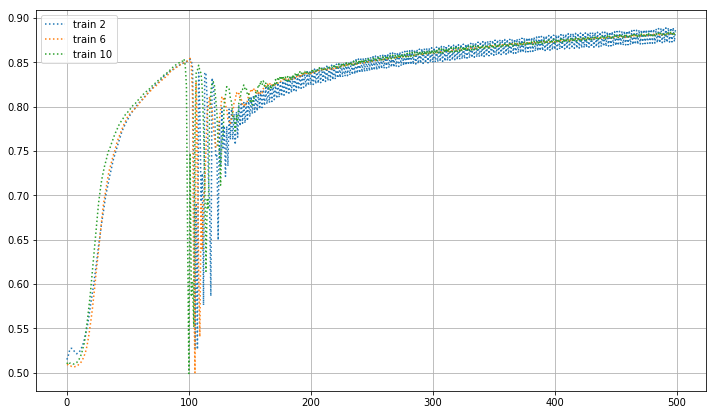

In [53]:
plt.figure(figsize=(12,7)) 
hidden_sizes = range(2,11,4)
for i,model in enumerate(models):
    m = model.information
#     plt.plot(range(num_iterations), m['valid_loss'], '-', label='valid '+ str(hidden_sizes[i]))
    plt.plot(range(num_iterations), m['train_loss'], ':', label='train '+ str(hidden_sizes[i]))
    plt.yticks(np.arange(0.5, 0.95, 0.05))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()